<a href="https://colab.research.google.com/github/sanju4n3ro/inteligencia-artificial/blob/main/Perceptr%C3%B3n_multicapa_Fuente_de_datos_personal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   0                    1
0 -1  19/07/2008 11:55:00
1 -1  19/07/2008 12:32:00
2  1  19/07/2008 13:17:00
3 -1  19/07/2008 14:43:00
4 -1  19/07/2008 15:22:00
       0        1          2          3       4      5         6       7    \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   97.6133  0.1242   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   95.4878  0.1241   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0  104.2367  0.1217   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   

      8       9    ...     580       581     582     583     584      585  \
0  1.5005  0.0162  ...     NaN       NaN  0.5005  0.0118  0.0035   2.3630   
1  1.4966 -0.0005  ...  0.0060  208.2045  0.5019  0.0223  0.0055   4.4447   
2  1.4436  0.0041  ...  0.0148   82.8602  0.4958  0.0157  0.0039   3.1745   
3  1.4882 -0.0124  ...  0.0044   73.8432  0.4990  0.0103  0.0025   

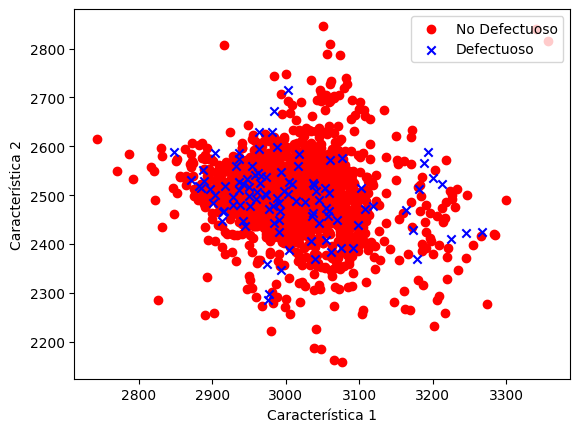

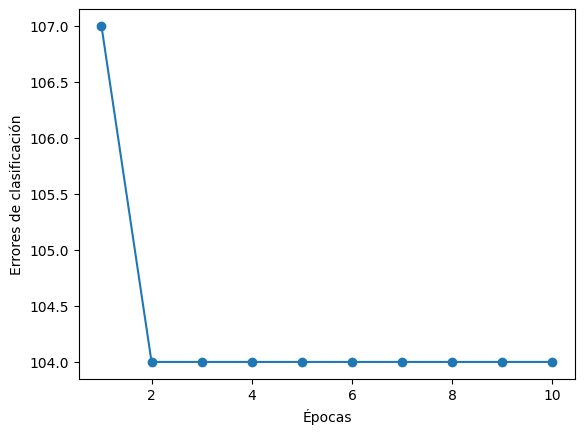

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Clase Perceptrón
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1): # Fixed typo here
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Cargar el dataset SECOM (secom_labels.data)
url_labels = 'https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data'
url_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data'

# Cargar los datos
df_labels = pd.read_csv(url_labels, sep=' ', header=None)
df_data = pd.read_csv(url_data, sep=' ', header=None)

# Revisar las primeras filas para ver la estructura
print(df_labels.head())
print(df_data.head())

# Preparar los datos
y = df_labels[0].values  # Etiquetas: 1 es defectuoso, -1 es no defectuoso
y = np.where(y == 1, 1, -1)  # Normalizamos las etiquetas a 1 y -1

# Tomar un subconjunto de los datos (por ejemplo, las primeras 2 columnas para simplificar)
X = df_data.iloc[:, :2].values  # Seleccionamos las primeras 2 características para el modelo

# Visualizar los datos
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', marker='o', label='No Defectuoso')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='x', label='Defectuoso')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend(loc='upper right')
plt.show()

# Entrenar el perceptrón
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

# Graficar los errores por época
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Errores de clasificación')
plt.show()